http://archive.ics.uci.edu/ml/datasets/Statlog+%28German+Credit+Data%29

In [3]:
import pandas as pd

In [4]:
data = pd.read_csv('german_credit_data_risk.csv', index_col=0)

In [5]:
print(data.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1000 entries, 0 to 999
Data columns (total 10 columns):
Age                 1000 non-null int64
Sex                 1000 non-null object
Job                 1000 non-null int64
Housing             1000 non-null object
Saving accounts     817 non-null object
Checking account    606 non-null object
Credit amount       1000 non-null int64
Duration            1000 non-null int64
Purpose             1000 non-null object
Risk                1000 non-null object
dtypes: int64(4), object(6)
memory usage: 85.9+ KB
None


In [6]:
data.head()

,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration,Purpose,Risk
0,67,male,2,own,NaN,little,1169,6,radio/TV,good
1,22,female,2,own,little,moderate,5951,48,radio/TV,bad
2,49,male,1,own,little,NaN,2096,12,education,good
3,45,male,2,free,little,little,7882,42,furniture/equipment,good
4,53,male,2,free,little,little,4870,24,car,bad


Количество уникальных значений для каждой переменной

In [7]:
data.apply(pd.Series.nunique)

Age                  53
Sex                   2
Job                   4
Housing               3
Saving accounts       4
Checking account      3
Credit amount       921
Duration             33
Purpose               8
Risk                  2
dtype: int64

In [8]:
def my_dummies(series):
    res = pd.get_dummies(series)
#     if res.shape[1] == 2:
#         # binary feature
#         return res.iloc[:,0].rename(series.name+':'+res.columns[0]), {series.name:[series.name+':'+res.columns[0]]}
    res = pd.DataFrame(res.values, columns=[series.name+':'+str(x) for x in res.columns], index=res.index)
    res_cols = {series.name: [str(x) for x in res.columns]}
    return res, res_cols

In [9]:
cat_vars = ['Sex', 'Job', 'Housing', 'Saving accounts', 'Checking account', 'Purpose', 'Risk']
non_cat = list(set(data.columns) - set(cat_vars))

In [10]:
my_dummies(data['Sex'])[1]

{'Sex': ['Sex:female', 'Sex:male']}

In [13]:
vars_dict['Housing']

dict_values([['Housing:free', 'Housing:own', 'Housing:rent']])

In [12]:
res = []
vars_dict = {}
for x in cat_vars:
    res.append(my_dummies(data[x])[0])
    
    vars_dict[x] = my_dummies(data[x])[1].values()
res = pd.concat(res, axis=1)
res.head()

,Sex:female,Sex:male,Job:0,Job:1,Job:2,Job:3,Housing:free,Housing:own,Housing:rent,Saving accounts:little,...,Purpose:business,Purpose:car,Purpose:domestic appliances,Purpose:education,Purpose:furniture/equipment,Purpose:radio/TV,Purpose:repairs,Purpose:vacation/others,Risk:bad,Risk:good
0,0,1,0,0,1,0,0,1,0,0,...,0,0,0,0,0,1,0,0,0,1
1,1,0,0,0,1,0,0,1,0,1,...,0,0,0,0,0,1,0,0,1,0
2,0,1,0,1,0,0,0,1,0,1,...,0,0,0,1,0,0,0,0,0,1
3,0,1,0,0,1,0,1,0,0,1,...,0,0,0,0,1,0,0,0,0,1
4,0,1,0,0,1,0,1,0,0,1,...,0,1,0,0,0,0,0,0,1,0


In [14]:
new_data = pd.concat([res, data[non_cat]],axis=1)
new_data.drop('Risk:good', axis=1, inplace=True)
new_data.head()

,Sex:female,Sex:male,Job:0,Job:1,Job:2,Job:3,Housing:free,Housing:own,Housing:rent,Saving accounts:little,...,Purpose:domestic appliances,Purpose:education,Purpose:furniture/equipment,Purpose:radio/TV,Purpose:repairs,Purpose:vacation/others,Risk:bad,Credit amount,Age,Duration
0,0,1,0,0,1,0,0,1,0,0,...,0,0,0,1,0,0,0,1169,67,6
1,1,0,0,0,1,0,0,1,0,1,...,0,0,0,1,0,0,1,5951,22,48
2,0,1,0,1,0,0,0,1,0,1,...,0,1,0,0,0,0,0,2096,49,12
3,0,1,0,0,1,0,1,0,0,1,...,0,0,1,0,0,0,0,7882,45,42
4,0,1,0,0,1,0,1,0,0,1,...,0,0,0,0,0,0,1,4870,53,24


Построить графики распределения целевой переменной *Risk:bad*

In [17]:
new_data['Risk:bad'].head()

0    0
1    1
2    0
3    0
4    1
Name: Risk:bad, dtype: uint8

<IPython.core.display.Javascript object>


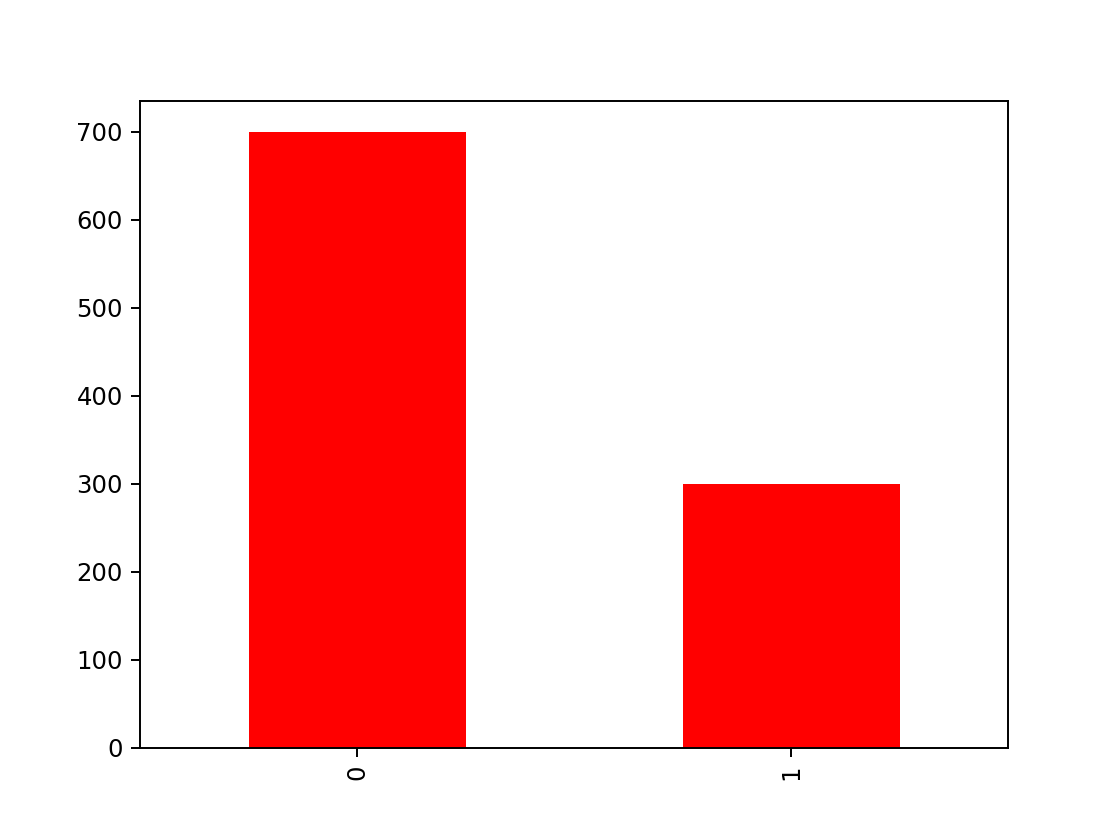

In [30]:
%matplotlib notebook
new_data['Risk:bad'].value_counts().plot.bar(color='r')

Построить карту корреляций

<IPython.core.display.Javascript object>


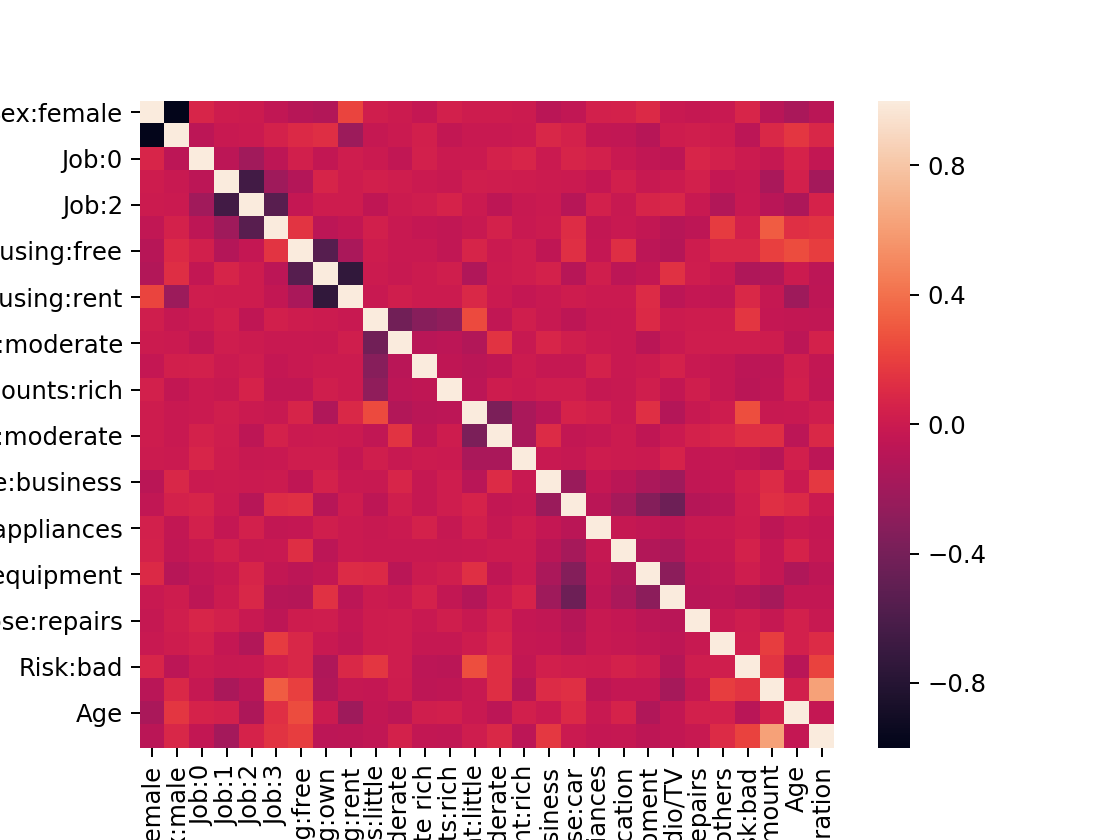

(array([  0.5,   2.5,   4.5,   6.5,   8.5,  10.5,  12.5,  14.5,  16.5,
         18.5,  20.5,  22.5,  24.5,  26.5]),
 <a list of 14 Text yticklabel objects>)

In [23]:
import seaborn as sns 
import matplotlib.pyplot as plt 
#new_data.corr() 
fig, ax = plt.subplots() 
sns.heatmap(new_data.corr(), ax=ax)
plt.xticks(rotation='vertical')
plt.yticks(rotation='horizontal')

Построить базовую модель логит регрессии

In [299]:
target = ['Risk:bad']
non_target = list(set(new_data.columns) - set(target))

In [300]:
from sklearn.linear_model import LogisticRegression, LogisticRegressionCV

In [301]:
y = new_data[target]
X = new_data[non_target]

In [302]:
from sklearn.cross_validation import train_test_split

In [303]:
X_train, X_test, y_train, y_test = train_test_split(\
                            X, y, test_size=0.33, random_state=42)

In [304]:
lr = LogisticRegression()

In [305]:
lr.fit(X=X_train, y=y_train)

C:\Anaconda3\lib\site-packages\sklearn\utils\validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [306]:
lr.score(X_test,y_test)

0.72727272727272729

Поиграть с параметрами

Например, вместо возраста создать параметр принадлежности к одной из групп:

'Student', 'Young', 'Adult', 'Senior'

In [273]:
# code here

Посмотреть на графики еще раз

In [307]:
import matplotlib.pyplot as plt
%matplotlib inline

In [317]:
def plot_by_group(x_,y):
    x = list(vars_dict[x_])[0]
    my_data = new_data[x+[y]]
    tmp = my_data.groupby(y).agg('sum')/my_data.groupby(y).agg('sum').sum(axis=0)
    tmp.T.plot.bar()

In [309]:
list(vars_dict['Housing'])

[['Housing:free', 'Housing:own', 'Housing:rent']]

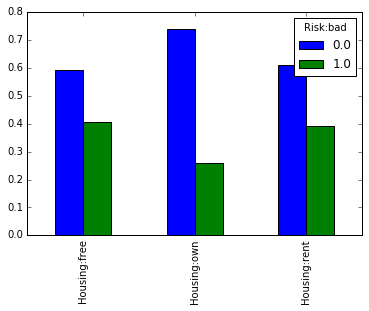

In [320]:
plot_by_group('Housing', 'Risk:bad')

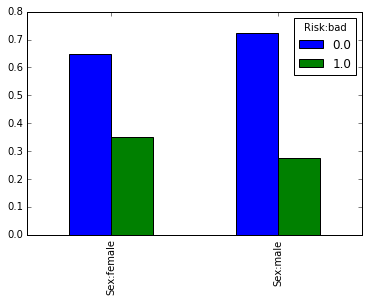

In [318]:
plot_by_group('Sex', 'Risk:bad')

In [321]:
# more graphs

In [322]:
# with new variables

In [323]:
# add new variables

In [324]:
# cross validate your model